In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 (Mac 기준)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 13

In [2]:
# -------------------------
# 02 산출물 로드
# -------------------------
df_02 = pd.read_csv("../data/artifacts/02_team_year_structural_full.csv")
team_avg = pd.read_csv("../data/artifacts/02_team_avg_2021_2025_typology_summary.csv")

print("✅ Loaded 02 outputs")
display(df_02.head())
display(team_avg)

✅ Loaded 02 outputs


,Year,Team,PA,AB,R,H_x,2B,3B,HR_x,TB,...,ERA_adv_z,FIP_adv_z,BB_9_adv_z,HR_9_adv_z,H_9_adv_z,Off_Score,Pit_Score,Typology,Top_Adv,Top_Gap
0,2021,KIA,5577,4831,568,1198,183,21,66,1621,...,-0.855375,-0.843117,-0.585440,-0.796000,-0.376436,-1.091583,-0.835205,Overall Weak,"SO_PA(+0.77), BB_HBP_PA(+0.08), H_9(-0.38)","R_PA(-2.10), ISO(-1.65), HR_PA(-1.33)"
1,2021,KT,5626,4810,719,1276,219,11,106,1835,...,1.396086,1.590811,1.731571,1.327270,1.223872,0.435449,1.389323,Balanced Strong,"BB_9(+1.73), FIP(+1.59), ERA(+1.40)","ISO(-0.33), HR_PA(-0.27), SO_PA(-0.19)"
2,2021,LG,5533,4750,654,1188,210,11,110,1750,...,1.564323,1.922102,0.802535,1.615023,2.091584,-0.137541,1.489754,Pitching-driven,"H_9(+2.09), FIP(+1.92), HR_9(+1.62)","OBP(-0.57), R_PA(-0.47), ISO(-0.24)"
3,2021,NC,5530,4806,702,1254,203,17,170,2001,...,-0.164524,0.291679,-0.151096,-0.445695,-0.319211,0.161541,0.051734,Balanced Strong,"HR_PA(+1.53), ISO(+1.47), K_9(+0.78)","BB_HBP_PA(-0.91), SO_PA(-0.72), HR_9(-0.45)"
4,2021,SSG,5735,4898,755,1278,204,13,185,2063,...,-0.708438,-0.701780,-0.483668,-1.418007,-0.449628,1.013154,-0.687838,Offense-driven,"HR_PA(+1.76), ISO(+1.69), BB_HBP_PA(+1.11)","HR_9(-1.42), ERA(-0.71), FIP(-0.70)"


,Team,Off_Score,Pit_Score,OBP_diff,R_PA_diff,SO_PA_diff,FIP_diff,ERA_diff,HR_9_diff,Typology
0,LG,0.898094,0.668209,-0.001418,-0.003313,-0.006666,-0.193684,-0.101039,-0.076954,Balanced Strong
1,KIA,0.324515,-0.123608,-0.009680,-0.010356,0.006967,-0.181729,0.573307,0.107983,Offense-driven
2,SSG,0.296954,-0.349967,-0.017270,-0.011165,0.019933,120.246898,0.483034,0.197905,Offense-driven
3,NC,0.284780,0.003886,-0.012846,-0.009256,0.022055,-0.193841,0.521981,0.143286,Balanced Strong
4,삼성,0.182003,-0.172488,-0.014353,-0.008888,0.012605,0.103238,0.496368,0.224569,Offense-driven
5,KT,-0.035092,0.615708,-0.013490,-0.013470,0.024701,-0.828974,0.165812,0.010660,Pitching-driven
6,두산,-0.171056,0.113475,-0.019227,-0.012509,0.015726,-0.346686,0.442039,0.051137,Pitching-driven
7,롯데,-0.181560,-0.248284,-0.012648,-0.012955,0.009976,68.456405,0.874242,0.062903,Overall Weak
8,한화,-0.738375,-0.125735,-0.024631,-0.020478,0.039923,18.436152,0.568577,0.058167,Overall Weak
9,키움,-0.860261,-0.381196,-0.024434,-0.021570,0.025928,0.158670,0.713967,0.081651,Overall Weak


In [3]:
TARGET_TEAM = "삼성"
TARGET_YEAR = 2025

BAT_COLS = ["OBP", "BB_HBP_PA", "ISO", "HR_PA", "R_PA", "SO_PA"]
PIT_COLS = ["ERA", "FIP", "BB_9", "K_9", "HR_9", "H_9"]

In [4]:
samsung_2025 = df_02.query("Team == @TARGET_TEAM and Year == @TARGET_YEAR").copy()
display(samsung_2025[[
    "Year","Team","Off_Score","Pit_Score","Typology","Top_Adv","Top_Gap"
]])

,Year,Team,Off_Score,Pit_Score,Typology,Top_Adv,Top_Gap
47,2025,삼성,1.217652,0.173162,Balanced Strong,"ISO(+1.89), HR_PA(+1.66), R_PA(+1.38)","HR_9(-0.76), K_9(-0.47), H_9(+0.19)"


In [5]:
samsung_avg = team_avg.query("Team == @TARGET_TEAM").copy()
display(samsung_avg)

,Team,Off_Score,Pit_Score,OBP_diff,R_PA_diff,SO_PA_diff,FIP_diff,ERA_diff,HR_9_diff,Typology
4,삼성,0.182003,-0.172488,-0.014353,-0.008888,0.012605,0.103238,0.496368,0.224569,Offense-driven


In [6]:
# 지표 단위 원인 분석 (삼성 vs Strong Model, 2025)
def build_diff_table(row, bat_cols, pit_cols):
    rows = []

    for c in bat_cols:
        rows.append((
            "OFF", c,
            row[c],
            row[f"{c}_strong"],
            row[f"{c}_diff"],
            row[f"{c}_adv"]
        ))

    for c in pit_cols:
        rows.append((
            "PIT", c,
            row[c_tables := c],
            row[f"{c}_strong"],
            row[f"{c}_diff"],
            row[f"{c}_adv"]
        ))

    return pd.DataFrame(
        rows,
        columns=["Side","Metric","Team","Strong","Diff(Team-Strong)","Adv(+)"]
    )

In [7]:
r = samsung_2025.iloc[0]
diff_tbl_2025 = build_diff_table(r, BAT_COLS, PIT_COLS)

# 우위 → 열위 순 정렬
diff_tbl_2025_sorted = diff_tbl_2025.sort_values("Adv(+)", ascending=False)
display(diff_tbl_2025_sorted)

,Side,Metric,Team,Strong,Diff(Team-Strong),Adv(+)
7,PIT,FIP,5.104828,6.438333,-1.333506,1.333506
8,PIT,BB_9,3.243307,3.468058,-0.224751,0.224751
2,OFF,ISO,0.155134,0.131558,0.023576,0.023576
3,OFF,HR_PA,0.028390,0.022763,0.005627,0.005627
4,OFF,R_PA,0.136660,0.137979,-0.001319,-0.001319
1,OFF,BB_HBP_PA,0.114618,0.117493,-0.002874,-0.002874
0,OFF,OBP,0.353319,0.360659,-0.007340,-0.007340
5,OFF,SO_PA,0.191677,0.170723,0.020954,-0.020954
9,PIT,K_9,7.470299,7.628316,-0.158016,-0.158016
11,PIT,H_9,8.960082,8.730184,0.229899,-0.229899


In [8]:
# 컨설팅 문장 자동 생성 (요약 5줄)
def metric_kor(m):
    kor = {
        "OBP":"출루율(OBP)",
        "BB_HBP_PA":"볼넷+사구 비율",
        "SO_PA":"삼진 비율",
        "ISO":"장타력(ISO)",
        "HR_PA":"홈런 비율",
        "R_PA":"득점 효율",
        "ERA":"평균자책",
        "FIP":"FIP",
        "BB_9":"볼넷/9",
        "K_9":"삼진/9",
        "HR_9":"피홈런/9",
        "H_9":"피안타/9",
    }
    return kor.get(m, m)

def pick_top_bottom(diff_tbl, side, k=2):
    d = diff_tbl[diff_tbl["Side"] == side]
    top = d.sort_values("Adv(+)", ascending=False).head(k)
    bot = d.sort_values("Adv(+)", ascending=True).head(k)
    return top, bot

def gen_consulting_text(team, year, diff_tbl):
    off_top, off_bot = pick_top_bottom(diff_tbl, "OFF", 2)
    pit_top, pit_bot = pick_top_bottom(diff_tbl, "PIT", 2)

    def fmt(df):
        return ", ".join(
            [f"{metric_kor(m)}({v:+.2f})" for m, v in zip(df["Metric"], df["Adv(+)"])]
        )

    lines = []
    lines.append(f"{year}시즌 {team}은 Strong Champion Model 대비 구조적 차이를 기준으로 팀 포지셔닝을 정리함.")
    lines.append(f"공격 강점: {fmt(off_top)} / 공격 개선 필요: {fmt(off_bot)}.")
    lines.append(f"투수 강점: {fmt(pit_top)} / 투수 개선 필요: {fmt(pit_bot)}.")
    lines.append("핵심 전략은 강점 지표를 유지 가능한 구조로 고정하고, 득점·실점에 직접 연결되는 약점 지표를 우선 개선하는 것임.")
    lines.append("이에 따라 타격 접근과 투수 운용을 지표 중심으로 재설계하는 컨설팅 방향을 제안함.")
    return "\n".join(lines)

print(gen_consulting_text(TARGET_TEAM, TARGET_YEAR, diff_tbl_2025))


2025시즌 삼성은 Strong Champion Model 대비 구조적 차이를 기준으로 팀 포지셔닝을 정리함.
공격 강점: 장타력(ISO)(+0.02), 홈런 비율(+0.01) / 공격 개선 필요: 삼진 비율(-0.02), 출루율(OBP)(-0.01).
투수 강점: FIP(+1.33), 볼넷/9(+0.22) / 투수 개선 필요: 평균자책(-0.32), 피홈런/9(-0.30).
핵심 전략은 강점 지표를 유지 가능한 구조로 고정하고, 득점·실점에 직접 연결되는 약점 지표를 우선 개선하는 것임.
이에 따라 타격 접근과 투수 운용을 지표 중심으로 재설계하는 컨설팅 방향을 제안함.


In [10]:
# 컨설팅 문장 자동 생성 (요약 5줄)
def gen_action_plan(diff_tbl):
    off_top, off_bot = pick_top_bottom(diff_tbl, "OFF", 2)
    pit_top, pit_bot = pick_top_bottom(diff_tbl, "PIT", 2)

    action_map = {
        "OBP":"출루율 개선을 위해 존 인식·볼넷 유도 중심의 타석 접근 훈련을 강화함.",
        "SO_PA":"삼진 리스크를 팀 관리 지표로 설정하고 투스트라이크 접근 훈련을 도입함.",
        "ISO":"장타 생산을 늘리기 위해 타구 질 기반 훈련과 중심 타선 역할을 재정의함.",
        "R_PA":"득점 효율 병목 구간을 분해해 주루·득점권 운영을 개선함.",
        "FIP":"FIP 악화 요인을 BB·HR 중심으로 분해해 투수 핵심 결과 관리에 집중함.",
        "BB_9":"볼넷 억제를 위해 스트라이크 선행 비율을 KPI로 설정함.",
        "HR_9":"피홈런 억제를 위해 실투 구간 관리와 구종 운용을 조정함.",
    }

    actions = []
    for m in list(off_bot["Metric"]) + list(pit_bot["Metric"]):
        actions.append(action_map.get(m, f"{metric_kor(m)} 개선을 위한 실행안을 설계함."))

    uniq = []
    for a in actions:
        if a not in uniq:
            uniq.append(a)

    return "\n".join([f"- {a}" for a in uniq[:3]])

print(gen_action_plan(diff_tbl_2025))


- 삼진 리스크를 팀 관리 지표로 설정하고 투스트라이크 접근 훈련을 도입함.
- 출루율 개선을 위해 존 인식·볼넷 유도 중심의 타석 접근 훈련을 강화함.
- 평균자책 개선을 위한 실행안을 설계함.


,Year,Off_Score,Pit_Score,Typology
7,2021,0.085925,0.087405,Balanced Strong
17,2022,-0.184464,-0.410035,Overall Weak
27,2023,-0.364845,-0.780760,Overall Weak
37,2024,0.155746,0.067787,Balanced Strong
47,2025,1.217652,0.173162,Balanced Strong


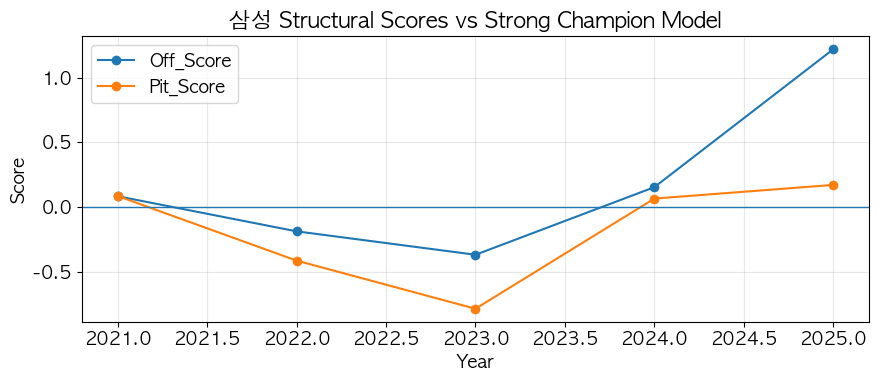

In [11]:
# 선택) 삼성 구조 점수 추이 (2021–2025)
samsung_ts = df_02.query("Team == @TARGET_TEAM")[["Year","Off_Score","Pit_Score","Typology"]]
display(samsung_ts)

plt.figure(figsize=(9,4))
plt.plot(samsung_ts["Year"], samsung_ts["Off_Score"], marker="o", label="Off_Score")
plt.plot(samsung_ts["Year"], samsung_ts["Pit_Score"], marker="o", label="Pit_Score")
plt.axhline(0, linewidth=1)
plt.title(f"{TARGET_TEAM} Structural Scores vs Strong Champion Model")
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()